# Author : Sudarshan Khandelwal
# TASK 6: Prediction Using Decision Tree Algorithm
# GRIP @ The Sparks Foundation

# Problem Statement::
To create a decision Tree for given dataset and visualize it graphically and to predict any new data accordingly.


# Technical Stack : Scikit Learn, Numpy Array, Pandas, Matplotlib

# Importing Libraries

In [3]:
import numpy as np                   
import pandas as pd                 
import seaborn as sns       
import matplotlib.pyplot as plt 
%matplotlib inline  

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import warnings                  # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

# Loading Datasets

In [5]:
# Importing libraries in Python
import sklearn.datasets as datasets

# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [6]:
# Target
y=iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Data Description

In [7]:
df.shape

(150, 4)

In [8]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Checking for NULL or NAN values 

In [11]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [12]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# Data Visualization

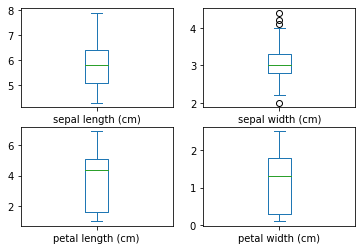

In [13]:
## Box Plot
df.plot(kind='box', subplots = True, layout=(2,2), sharex=False, sharey=False)
plt.show()

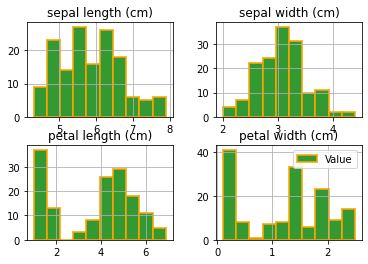

In [14]:
#Histogram
bins,patch = df.hist(bins=10, color='green', alpha=0.8, label='Value', edgecolor='orange', linewidth=2)
plt.legend()

In [15]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

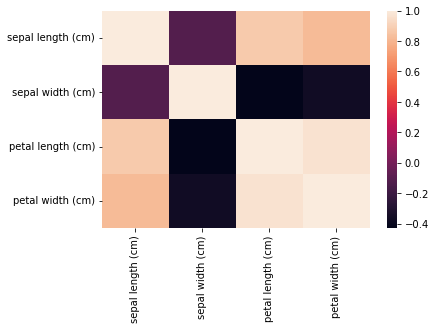

In [16]:
sns.heatmap(df.corr())

# Train_Test_Split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.2,random_state=42)
print("Traingin split:",X_train.shape)
print("Testin spllit:",X_test.shape)

Traingin split: (120, 4)
Testin spllit: (30, 4)


# Tree Classifier

In [18]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print("Decision Tree Classifier created successfully!")

Decision Tree Classifier created successfully!


# Classification Report

In [19]:
y_pred=dtree.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [20]:
print("Accuracy score:",accuracy_score(y_test,y_pred))

Accuracy score: 1.0


# Confusion Matrix

In [21]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

# Visualization of Trained Tree Model 

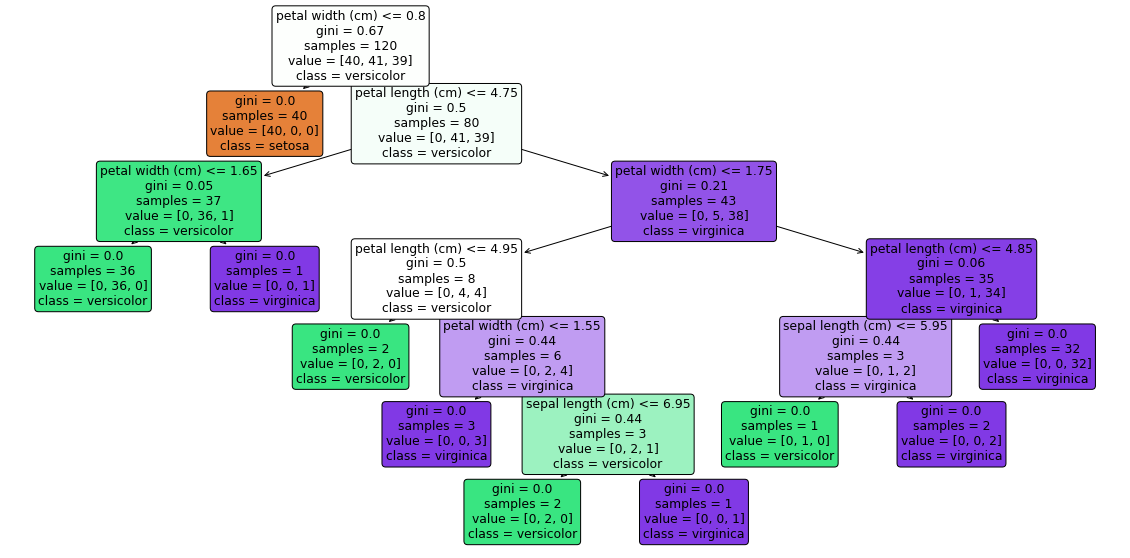

In [23]:
from sklearn.tree import plot_tree

#visualizing the graph
fig=plt.figure(figsize=(20,10))
tree=plot_tree(dtree,feature_names=iris.feature_names,precision=2,rounded=True,filled=True,class_names=iris.target_names)

In [24]:
print('The decision tree is visualized successfully')

The decision tree is visualized successfully


# Conclusion

# I was able to successfully carry-out prediction using Prediction using Decision Tree Algorithm and was able to evaluate the model's accuracy score.